In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv(r'/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


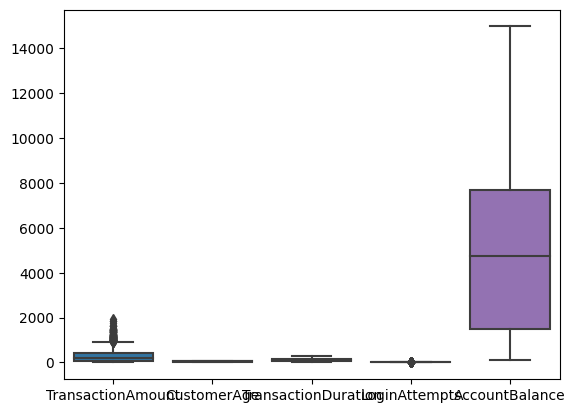

In [6]:
sns.boxplot(data)
plt.show()

In [33]:
data['CustomerAge'].head()

0    70
1    68
2    19
3    26
4    26
Name: CustomerAge, dtype: int64

In [35]:
data['AccountBalance']

0        5112.21
1       13758.91
2        1122.35
3        8569.06
4        7429.40
          ...   
2507    12690.79
2508      254.75
2509     3382.91
2510     1776.91
2511      131.25
Name: AccountBalance, Length: 2512, dtype: float64

# Data Preparation

In [8]:
data = data.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

In [9]:
def vectorizer(data):
    vectorizer = TfidfVectorizer()
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = vectorizer.fit_transform(data[col]).toarray()
    return data

In [10]:
data = vectorizer(data)

In [12]:
def normalizer(df):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    for col in data.columns:
        data[col] = data[col].apply(lambda x: upper_bound[col] if x > upper_bound[col] else(lower_bound[col] if x < lower_bound[col] else x))
    return data
    

In [13]:
data = normalizer(data)

In [14]:
X = data

# Model Building 

In [15]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [16]:
y_pred = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualization

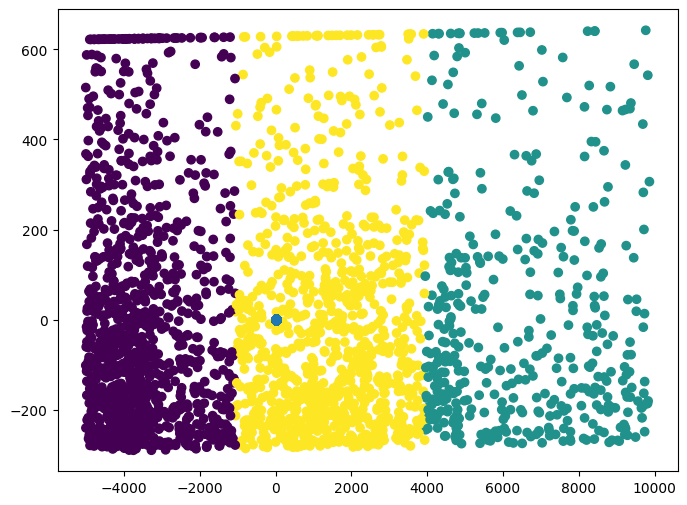

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(y_pred,y_pred)
plt.show()

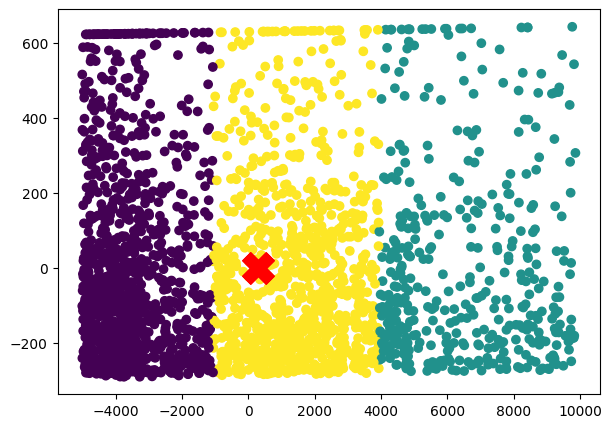

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1], c='red', s=500, marker='X')
plt.show()

In [20]:
inertia = []
cluster_range = range(1,15)
for k in cluster_range:
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

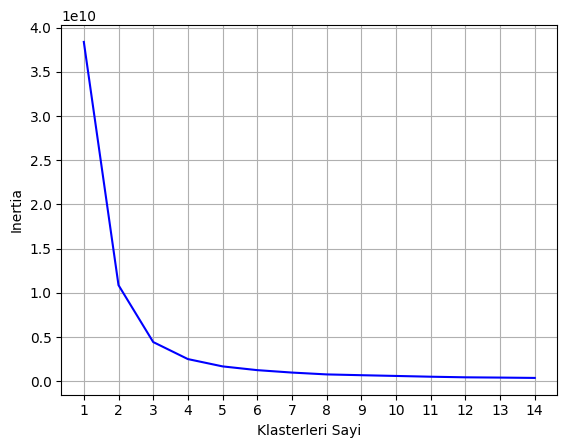

In [21]:
plt.plot(cluster_range,inertia, linestyle='-', c='blue' )
plt.xlabel('Klasterleri Sayi')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [22]:
print(f'Inertia:\n{kmeans.inertia_}')

Inertia:
375136210.3369941
